## Random Survival Analysis

In [181]:
import pandas as pd

# read csv from github url
# return pandas dataframe
url = "https://raw.githubusercontent.com/prathikr/CAIS_Marijuana_Project/master/BISTRA_GROUP_PROJECT_SMALL.csv"
df = pd.read_csv("augmented_dataset.csv")
df.head(5)

,ID,female,nonwhite,unemplmt,primsev,B2a_0,State,City,zipcode,noins,prsatx,tottxp4,TRI_0,GVS,E9a,E9b,E9c,E9d,E9e,E9e18,E9f,E9g,E9h,E9j,E9k,E9m,tsd_0,und15,CWS_0,IPI,L5,SPSy_0,RFQ33c,GSSI_0,S9y10,dldiag,press,DSS9_0,ADHDs_0,CDS_0,...,S2c1_6,S2c1_12,S2b1_0,S2b1_3,S2b1_6,S2b1_12,S2z1_3,S2z1_6,S2z1_12,S2z2_3,S2z2_6,S2z2_12,S2z3_3,S2z3_6,S2z3_12,S2z4_3,S2z4_6,S2z4_12,S2z5_3,S2z5_6,S2z5_12,Any_Cens,Alcohol_Cens,Binge_Cens,Marijuana_Cens,Illicit_Cens,Any_Days,Alcohol_Days,Binge_Days,Marijuana_Days,Illicit_Days,latitude,longitude,FIPS_code,"% Households: Family Households: Other Family: Female Householder, No Husband Present",% Civilian Population in Labor Force 16 Years and Over: Unemployed,% Population Under 18 Years of Age for Whom Poverty Status Is Determined: Living in Poverty,% Population Age 18 to 64 for Whom Poverty Status Is Determined: Living in Poverty,% Population Age 65 and Over for Whom Poverty Status Is Determined: Living in Poverty,% Owner Occupied Housing
0,9048,0,0,0,4,17,VA,Lynchburg,24501-1114,0,1,19,0,4,1,1,0,0,5,1,0,1,0,0,0,0,1,1,0,4,7,16,-999,6,8,1,1,7,8,7,...,0,-999,0,-999,0,-999,-999,90,-999,-999,90,-999.0,-999,90,-999,-999,90,-999,-999,90,-999,2,2,2,2,2,192,192,192,192,192,37.413043,-79.174424,51680000300,16.9,4.5,16.3,14.81,18.58,18.58
1,9152,0,0,0,1,18,VA,Lynchburg,24501-1114,0,0,21,1,8,1,1,0,1,14,1,1,1,1,1,0,0,1,1,0,6,4,0,-999,8,8,1,0,6,13,2,...,0,-999,-999,-999,0,-999,-999,90,-999,-999,90,-999.0,-999,90,-999,-999,90,-999,-999,-999,-999,2,2,2,2,2,176,176,176,176,176,37.413043,-79.174424,51680000300,16.9,4.5,16.3,14.81,18.58,18.58
2,9057,0,0,1,3,16,VA,Lynchburg,24501-1114,0,0,16,1,4,0,0,0,1,16,1,0,0,1,0,0,0,0,1,0,3,0,6,-999,9,8,1,1,2,5,4,...,0,1,3,2,3,0,21,87,81,21,87,90.0,-999,87,90,0,0,81,-999,-999,-999,0,0,2,0,2,21,21,365,81,365,37.413043,-79.174424,51680000300,16.9,4.5,16.3,14.81,18.58,18.58
3,9139,0,0,0,3,16,VA,Lynchburg,24501-1114,0,0,14,0,0,0,0,0,0,-999,0,0,0,0,0,0,0,0,1,0,2,1,6,-999,2,1,-999,1,1,4,2,...,0,0,5,0,2,0,20,1,90,-999,1,90.0,90,0,90,20,0,90,-999,0,-999,0,2,0,0,2,20,365,0,20,365,37.413043,-79.174424,51680000300,16.9,4.5,16.3,14.81,18.58,18.58
4,9051,0,1,0,3,17,VA,Lynchburg,24501-1114,0,0,12,0,0,0,0,0,0,-999,0,0,0,0,0,0,0,0,0,2,5,1,4,-999,7,8,0,1,1,7,3,...,75,39,0,2,3,0,14,7,2,30,7,30.0,30,7,-999,14,7,2,-999,-999,-999,0,0,0,0,1,14,30,30,14,356,37.413043,-79.174424,51680000300,16.9,4.5,16.3,14.81,18.58,18.58


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x3072f7ef0>]],
      dtype=object)

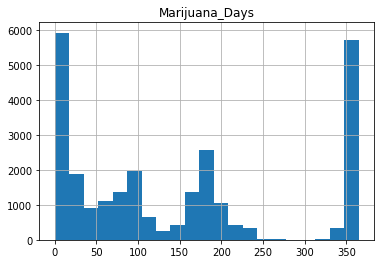

In [182]:
df = df[df.Marijuana_Days != -999] # removes all rows with Marijuana_Days = -999
df.hist(column='Marijuana_Days', bins=21) # 21 chosen so that there would be 3 bins between each x-axis number

In [183]:
# remove unnecessary features from dataset

print("Original df:", df.shape)

unused_potential_predictors = ['SFS8p_0', 'SFS8p_3', 'SFS8p_6', 'SFS8p_12', 'ada_0','ada_3',
'ada_6','ada_12','S2c1_0','S2c1_3','S2c1_6','S2c1_12','S2b1_0','S2b1_3','S2b1_6','S2b1_12','S2z1_3','S2z1_6',
'S2z1_12','S2z2_3','S2z2_6','S2z2_12','S2z3_3','S2z3_6','S2z3_12','S2z4_3','S2z4_6','S2z4_12','S2z5_3','S2z5_6',
'S2z5_12','Any_Cens','Alcohol_Cens','Binge_Cens','Marijuana_Cens','Illicit_Cens','Any_Days','Binge_Days',
'Alcohol_Days','Illicit_Days']

domain_expert_cols_to_drop = ['SPSy_0', 'loc', 'AFSS_0', 'E9a', 'E9b', 'E9c', 'E9d', 'E9e', 'E9e18', 'E9f', 'ID', 
'E9g', 'E9h', 'E9j', 'E9k', 'E9m', 'txtypeg', 'S7e4_0', 'engage42', 'POPIgrp','L5', 'E14a_0', 'E14b_0', 'SDScrY']

text_columns = ['City', 'agyaddr', 'zipcode', 'State']

cols_to_drop = text_columns + domain_expert_cols_to_drop + unused_potential_predictors

# drop columns and isolate to specific substance
df.drop(columns=cols_to_drop, inplace=True)
df = df[df.primsev == 3] # leaves only marijuana drug abusers in dataframe
df.drop(columns=['primsev'], inplace=True)
print("df Post-extracting predictor column and removing other predictors:", df.shape)
print("remaining columns: ", df.columns)

Original df: (26377, 119)
df Post-extracting predictor column and removing other predictors: (14077, 50)
remaining columns:  Index(['female', 'nonwhite', 'unemplmt', 'B2a_0', 'noins', 'prsatx', 'tottxp4',
       'TRI_0', 'GVS', 'tsd_0', 'und15', 'CWS_0', 'IPI', 'RFQ33c', 'GSSI_0',
       'S9y10', 'dldiag', 'press', 'DSS9_0', 'ADHDs_0', 'CDS_0', 'suicprbs_0',
       'CJSI_0', 'LRI7_0', 'SRI7_0', 'ERS21_0', 'homeless_0', 'S6', 'PSSI_0',
       'RERI13p_0', 'ncar', 'engage30', 'init', 'FIS4p_0', 'HIVrisk',
       'totttld', 'POS_0', 'S2x_0', 'SPSm_0', 'EPS7p_0', 'Marijuana_Days',
       'latitude', 'longitude', 'FIPS_code',
       '% Households: Family Households: Other Family: Female Householder, No Husband Present',
       '% Civilian Population in Labor Force 16 Years and Over: Unemployed',
       '% Population Under 18 Years of Age for Whom Poverty Status Is Determined: Living in Poverty',
       '% Population Age 18 to 64 for Whom Poverty Status  Is Determined: Living in Poverty',
  

In [184]:
# helper functions for displaying table data

import numpy as np
from IPython.display import display_html

# n is the number of columns to display data in
def display_side_by_side(series_obj, n):
    df = pd.DataFrame(series_obj)
    partition = int(round(len(df) / n))
    lower_bound = 0
    upper_bound = partition
    args = []
    for i in range(n):
        args.append(df[lower_bound:upper_bound])
        lower_bound += partition
        upper_bound += partition
    helper(args)

def helper(args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [185]:
# replace all -999 with NaN inplace
df.replace(to_replace = -999, value = np.nan, inplace=True)

# calculate percentage of NaNs in each column
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})

display_side_by_side(missing_value_df, 3)

,column_name,percent_missing
female,female,0.000000
nonwhite,nonwhite,0.035519
unemplmt,unemplmt,0.198906
B2a_0,B2a_0,0.000000
noins,noins,59.565248
prsatx,prsatx,0.269944
tottxp4,tottxp4,0.000000
TRI_0,TRI_0,1.228955
GVS,GVS,0.177595
tsd_0,tsd_0,0.234425


In [186]:
print("Original df:", df.shape)

# drop columns with > 25% NaNs
cols = []
for index, row in missing_value_df.iterrows():
    if row['percent_missing'] > 25:
      cols.append(row['column_name'])
df.drop(columns=cols, inplace=True)
print("columns dropped:", cols)
print("new df shape:", df.shape)

Original df: (14077, 50)
columns dropped: ['noins', 'RFQ33c', 'GSSI_0', 'press', 'PSSI_0', 'RERI13p_0', 'FIS4p_0']
new df shape: (14077, 43)


In [187]:
# paper mentions sorting was done by 1) level of care 2) gender 3) race 4) age
# level of care has been replaced with trauma scale
# age is not part of my current dataset (maybe ask Jordan for that data?)

df.sort_values(by=['GVS', 'female', 'nonwhite'], inplace=True)
df.head(10)

,female,nonwhite,unemplmt,B2a_0,prsatx,tottxp4,TRI_0,GVS,tsd_0,und15,CWS_0,IPI,S9y10,dldiag,DSS9_0,ADHDs_0,CDS_0,suicprbs_0,CJSI_0,LRI7_0,SRI7_0,ERS21_0,homeless_0,S6,ncar,engage30,init,HIVrisk,totttld,POS_0,S2x_0,SPSm_0,EPS7p_0,Marijuana_Days,latitude,longitude,FIPS_code,"% Households: Family Households: Other Family: Female Householder, No Husband Present",% Civilian Population in Labor Force 16 Years and Over: Unemployed,% Population Under 18 Years of Age for Whom Poverty Status Is Determined: Living in Poverty,% Population Age 18 to 64 for Whom Poverty Status Is Determined: Living in Poverty,% Population Age 65 and Over for Whom Poverty Status Is Determined: Living in Poverty,% Owner Occupied Housing
3,0,0.0,0.0,16,0.0,14,0.0,0.0,0.0,1.0,0.0,2.0,1.0,NaN,1.0,4.0,2.0,0.0,100.000000,8.0,18.0,44.0,0.0,0.0,1.0,0.0,1,4.0,980.0,0.0,5.0,0.0,12.698413,20,37.413043,-79.174424,51680000300,16.90,4.50,16.30,14.81,18.58,18.58
32,0,0.0,0.0,16,0.0,9,1.0,0.0,0.0,1.0,7.0,4.0,8.0,1.0,7.0,12.0,3.0,0.0,0.000000,9.0,14.0,37.0,0.0,0.0,0.0,1.0,0,2.0,1101.0,0.0,0.0,3.0,15.079365,1,42.586024,-70.980623,25009211401,14.67,6.37,13.79,11.37,7.80,7.80
34,0,0.0,1.0,19,1.0,13,1.0,0.0,0.0,0.0,0.0,0.0,8.0,NaN,0.0,0.0,0.0,0.0,100.000000,10.0,16.0,42.0,0.0,1.0,0.0,1.0,1,3.0,566.0,0.0,45.0,0.0,0.000000,365,38.843620,-82.244493,39053953900,10.54,4.14,24.54,15.88,11.38,11.38
54,0,0.0,0.0,15,0.0,13,0.0,0.0,0.0,1.0,0.0,0.0,8.0,NaN,1.0,0.0,0.0,0.0,100.000000,10.0,18.0,38.0,0.0,0.0,1.0,1.0,1,1.0,874.0,0.0,0.0,4.0,4.761905,365,36.166952,-86.805661,47037014200,30.08,9.70,81.93,33.42,41.18,41.18
95,0,0.0,1.0,18,0.0,14,1.0,0.0,0.0,1.0,0.0,6.0,8.0,1.0,2.0,12.0,0.0,0.0,66.666667,9.0,11.0,32.0,0.0,0.0,1.0,0.0,1,2.0,392.0,0.0,30.0,8.0,15.079365,15,38.411924,-82.365190,54011000102,16.37,7.03,25.99,24.87,6.25,6.25
113,0,0.0,0.0,14,1.0,9,1.0,0.0,0.0,1.0,0.0,3.0,2.0,1.0,6.0,12.0,4.0,0.0,41.111111,12.0,12.0,36.0,0.0,1.0,1.0,1.0,1,4.0,557.0,4.0,6.0,9.0,19.047619,365,29.147314,-81.152417,12127083206,3.05,5.59,0.92,10.69,8.45,8.45
140,0,0.0,0.0,16,0.0,7,1.0,0.0,0.0,1.0,0.0,4.0,8.0,NaN,0.0,0.0,0.0,0.0,100.000000,8.0,12.0,32.0,0.0,0.0,1.0,0.0,1,0.0,732.0,0.0,0.0,8.0,0.000000,3,29.763534,-95.401761,48201510700,3.34,1.61,0.00,3.24,0.00,0.00
148,0,0.0,0.0,16,0.0,13,2.0,0.0,0.0,1.0,0.0,NaN,8.0,1.0,0.0,12.0,6.0,0.0,100.000000,14.0,14.0,40.0,0.0,0.0,1.0,1.0,1,3.0,365.0,4.0,51.0,0.0,11.904762,45,41.419286,-81.701695,39035105900,8.53,9.35,42.88,26.31,8.77,8.77
153,0,0.0,0.0,17,1.0,9,0.0,0.0,0.0,0.0,0.0,NaN,8.0,NaN,4.0,0.0,0.0,0.0,100.000000,8.0,18.0,38.0,0.0,1.0,1.0,1.0,1,2.0,365.0,5.0,50.0,4.0,0.000000,196,41.419286,-81.701695,39035105900,8.53,9.35,42.88,26.31,8.77,8.77
191,0,0.0,1.0,25,1.0,12,0.0,0.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,11.111111,9.0,8.0,29.0,0.0,0.0,1.0,1.0,1,3.0,337.0,0.0,1.0,1.0,0.000000,0,38.843620,-82.244493,39053953900,10.54,4.14,24.54,15.88,11.38,11.38


In [188]:
# replace with mode
# DEBUG: figure out how to replace by only looking at upper and lower 10 rows
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)
"""for row_ind, row in df.iterrows(): 
    for item in row.iteritems():
        print(item)
        print(item[1])
        if pd.isnull(row[item[0]]):
            print(item)
            start = row_ind-10
            stop = row_ind+10
            if start < 0:
                start = 0
            if stop >= len(df):
                stop = len(df)
            print("Before", df.loc[row_ind, item[0]])
            print("Mode", df[start:stop][item[0]].mode())
            df[item[0]][row_ind] = df[start:stop][item[0]].mode()
            print("After", df.loc[row_ind, item[0]])"""

'for row_ind, row in df.iterrows(): \n    for item in row.iteritems():\n        print(item)\n        print(item[1])\n        if pd.isnull(row[item[0]]):\n            print(item)\n            start = row_ind-10\n            stop = row_ind+10\n            if start < 0:\n                start = 0\n            if stop >= len(df):\n                stop = len(df)\n            print("Before", df.loc[row_ind, item[0]])\n            print("Mode", df[start:stop][item[0]].mode())\n            df[item[0]][row_ind] = df[start:stop][item[0]].mode()\n            print("After", df.loc[row_ind, item[0]])'

In [189]:
# calculate percentage of NaNs in each column
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})

display_side_by_side(missing_value_df, 3)

,column_name,percent_missing
female,female,0.0
nonwhite,nonwhite,0.0
unemplmt,unemplmt,0.0
B2a_0,B2a_0,0.0
prsatx,prsatx,0.0
tottxp4,tottxp4,0.0
TRI_0,TRI_0,0.0
GVS,GVS,0.0
tsd_0,tsd_0,0.0
und15,und15,0.0


In [190]:
from sklearn.model_selection import train_test_split
from sksurv.util import Surv

df_m = df[df.nonwhite == 0]
df_f = df[df.nonwhite == 1]

# extract predictor
y_m = df_m.Marijuana_Days
y_f = df_f.Marijuana_Days
df_m.drop(columns=['Marijuana_Days'], inplace=True)
df_f.drop(columns=['Marijuana_Days'], inplace=True)

# create training and testing vars for m
X_train, X_test, y_train, y_test = train_test_split(df_m, y_m, test_size=0.2)
y_train_censored = Surv.from_arrays(y_train < 365, y_train.copy()) # structured array to ensure censoring of 365 value
y_test_censored = Surv.from_arrays(y_test < 365, y_test.copy()) # structured array to ensure censoring of 365 value
print(X_train.shape, y_train_censored.shape)
print(X_test.shape, y_test_censored.shape)

(3837, 42) (3837,)
(960, 42) (960,)


//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [191]:
from sksurv.ensemble import RandomSurvivalForest
# from sklearn.model_selection import cross_validate

#metric_names = ('r2', 'neg_mean_absolute_error', 
#'explained_variance', 'max_error', 'neg_mean_squared_error', 'neg_median_absolute_error')

rsf = RandomSurvivalForest()
rsf.fit(X_train, y_train_censored)
# cv_result = cross_validate(rsf, X_train, Ytr, cv=5, scoring=metric_names, return_estimator=True)

RandomSurvivalForest(bootstrap=True, max_depth=None, max_features='auto',
                     max_leaf_nodes=None, min_samples_leaf=3,
                     min_samples_split=6, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=None, oob_score=False,
                     random_state=None, verbose=0, warm_start=False)

In [192]:
rsf.score(X_test, y_test_censored)

0.6231043969518748

In [193]:
# predict on test data
pred_surv_m = rsf.predict_survival_function(X_test)
pred_haz_m = rsf.predict_cumulative_hazard_function(X_test)

In [194]:
# create training and testing vars for females
X_train, X_test, y_train, y_test = train_test_split(df_f, y_f, test_size=0.2)
y_train_censored = Surv.from_arrays(y_train < 365, y_train.copy()) # structured array to ensure censoring of 365 value
y_test_censored = Surv.from_arrays(y_test < 365, y_test.copy()) # structured array to ensure censoring of 365 value
print(X_train.shape, y_train_censored.shape)
print(X_test.shape, y_test_censored.shape)

(7424, 42) (7424,)
(1856, 42) (1856,)


In [195]:
rsf = RandomSurvivalForest()
rsf.fit(X_train, y_train_censored)

RandomSurvivalForest(bootstrap=True, max_depth=None, max_features='auto',
                     max_leaf_nodes=None, min_samples_leaf=3,
                     min_samples_split=6, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=None, oob_score=False,
                     random_state=None, verbose=0, warm_start=False)

In [196]:
rsf.score(X_test, y_test_censored)

0.6190440267113678

In [197]:
# predict on test data
pred_surv_f = rsf.predict_survival_function(X_test)
pred_haz_f = rsf.predict_cumulative_hazard_function(X_test)

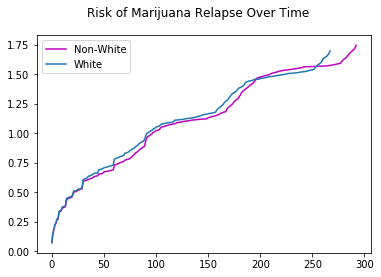

In [198]:
import matplotlib.pyplot as plt

# display hazard plot
plt.suptitle('Risk of Marijuana Relapse Over Time')
plt.plot(np.mean([person for person in pred_haz_f], axis=0), label="Non-White", color="m")
plt.plot(np.mean([person for person in pred_haz_m], axis=0), label="White")
plt.legend()
plt.show()

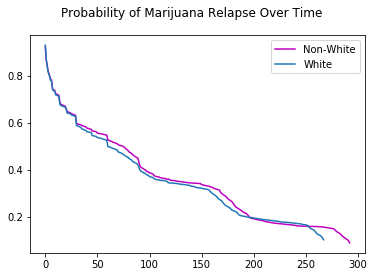

In [199]:
# display survival plots side-by-side for comparison
plt.suptitle('Probability of Marijuana Relapse Over Time')
plt.plot(np.mean([person for person in pred_surv_f], axis=0), label="Non-White", color="m")
plt.plot(np.mean([person for person in pred_surv_m], axis=0), label="White")
plt.legend()
plt.show()